Load a data file and check target pdfs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [13]:
file1 = np.load('particle_results_organized/test3/Velocities.npz')
V, U, DUDt, Vm = file1['V'], file1['U'], file1['DUDt'], file1['Vm']
target = DUDt
print(DUDt.shape)

(1950, 5000, 2)


In [3]:
s1 = 2    # steps for time: i.e. s1=2 -> take every other time step
s2 = 1    # steps for particles
print(V[::s1,::s2,0].flatten().shape)

(600000,)


In [4]:
def pdf(data, pts=500):
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), pts)
    p = kde(x)
    return x,p

# Plot PDF of flow velocity encountered by particles

In [14]:
ux, pux = pdf(U[::s1, ::s2, 0].flatten())
uy, puy = pdf(U[::s1, ::s2, 1].flatten())

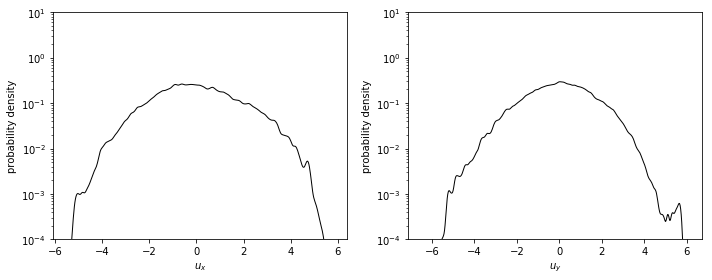

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].semilogy(ux, pux, 'k-', linewidth=1)
ax[0].set_ylim([1e-4, 1e1])
ax[0].set_xlabel('$u_x$')
ax[0].set_ylabel('probability density')

ax[1].semilogy(uy, puy, 'k-', linewidth=1)
ax[1].set_ylim([1e-4, 1e1])
ax[1].set_xlabel('$u_y$')
ax[1].set_ylabel('probability density')

plt.savefig('U.png', dpi=200);
plt.tight_layout()
plt.show()

# Plot PDF of Du/Dt encountered by particles

In [16]:
Dux, pDux = pdf(DUDt[::s1, ::s2, 0].flatten())
Duy, pDuy = pdf(DUDt[::s1, ::s2, 1].flatten())

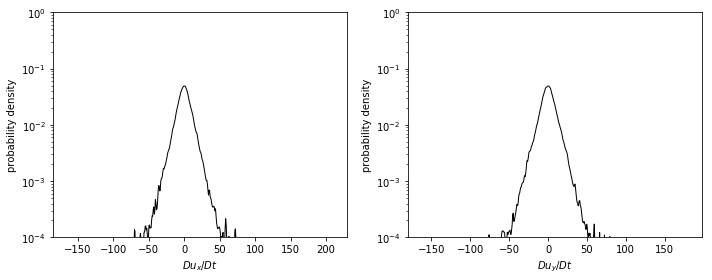

In [19]:
fig2, ax2 = plt.subplots(1, 2, figsize=(10,4))
ax2[0].semilogy(Dux, pDux, 'k-', linewidth=1)
ax2[0].set_ylim([1e-4, 1e0])
ax2[0].set_xlabel('$Du_x/Dt$')
ax2[0].set_ylabel('probability density')

ax2[1].semilogy(Duy, pDuy, 'k-', linewidth=1)
ax2[1].set_ylim([1e-4, 1e0])
ax2[1].set_xlabel('$Du_y/Dt$')
ax2[1].set_ylabel('probability density')

plt.savefig('pdf_DUDt.png', dpi=200);
plt.tight_layout()
plt.show()

# Plot PDF of V-U encountered by particles

Difference between particle and flow velocity. This is the statistics we hope to accurately capture (although we could be interested in the statistics at different time steps).

In [20]:
V_U = V - U
v_ux, pv_ux = pdf(V_U[::s1, ::s2, 0].flatten())
v_uy, pv_uy = pdf(V_U[::s1, ::s2, 1].flatten())

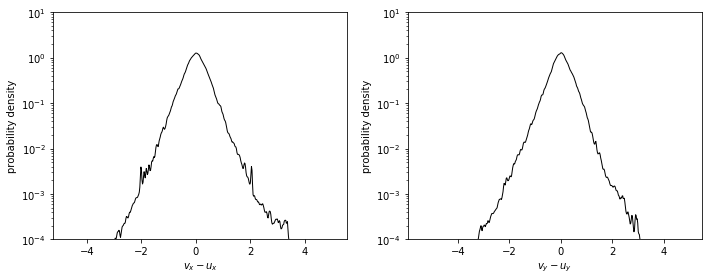

In [21]:
fig3, ax3 = plt.subplots(1, 2, figsize=(10,4))
ax3[0].semilogy(v_ux, pv_ux, 'k-', linewidth=1)
ax3[0].set_ylim([1e-4, 1e1])
ax3[0].set_xlabel('$v_x - u_x$')
ax3[0].set_ylabel('probability density')

ax3[1].semilogy(v_uy, pv_uy, 'k-', linewidth=1)
ax3[1].set_ylim([1e-4, 1e1])
ax3[1].set_xlabel('$v_y - u_y$')
ax3[1].set_ylabel('probability density')

plt.savefig('V-U.png', dpi=200);
plt.tight_layout()
plt.show()

# Plot PDF of V-Vm encountered by particles
Difference between particle velocity and first order approximation. This is the TARGET for the RNN-based model (need to make sure that the range is covered by the training data).

In [22]:
V_Vm = V - Vm
v_vmx, pv_vmx = pdf(V_Vm[::s1, ::s2, 0].flatten())
v_vmy, pv_vmy = pdf(V_Vm[::s1, ::s2, 1].flatten())

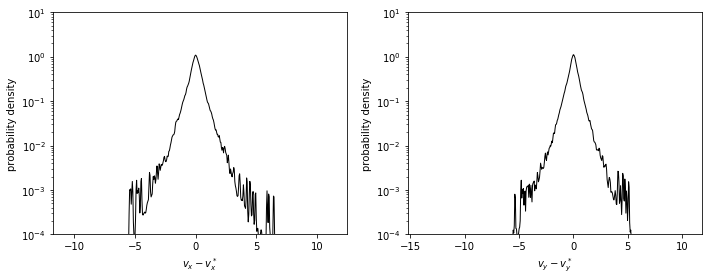

In [26]:
fig4, ax4 = plt.subplots(1, 2, figsize=(10,4))
ax4[0].semilogy(v_vmx, pv_vmx, 'k-', linewidth=1)
ax4[0].set_ylim([1e-4, 1e1])
ax4[0].set_xlabel('$v_x - v^*_x$')
ax4[0].set_ylabel('probability density')

ax4[1].semilogy(v_vmy, pv_vmy, 'k-', linewidth=1)
ax4[1].set_ylim([1e-4, 1e1])
ax4[1].set_xlabel('$v_y - v^*_y$')
ax4[1].set_ylabel('probability density')

plt.savefig('V-Vm.png', dpi=200);
plt.tight_layout()
plt.show()